In [262]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [263]:
df1 = pd.read_csv('credit_data.csv', delimiter=',')
df1.dataframeName = 'credit_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [342]:
print(df1.shape)
df1.head().transpose()

(30000, 25)


,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [265]:
counts = df1['default payment next month'].value_counts()
print(counts)

0    23364
1     6636
Name: default payment next month, dtype: int64


In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [267]:
defaulters = df1.copy()
defaulters.rename(columns={'default_payment_next_month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [268]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [269]:
defaulters.isna().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [270]:
defaulters.head(50)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [271]:
defaulters['Credit_Score'] = 500
for i in range(2, 7):
    defaulters['Credit_Score'] -= 10 * (defaulters[f'PAY_{i}'] > 0)
    


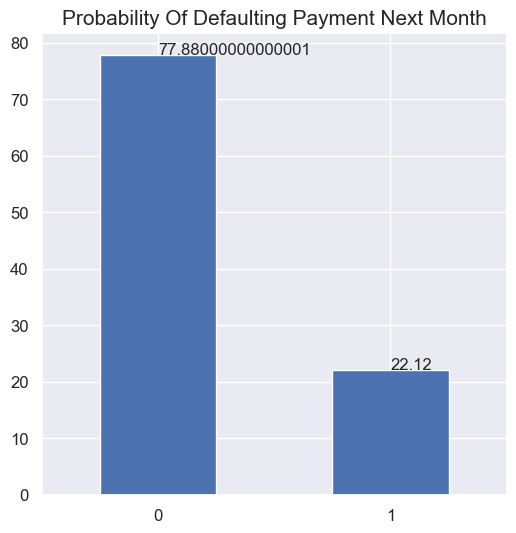

In [272]:
def_cnt = (defaulters['default payment next month'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

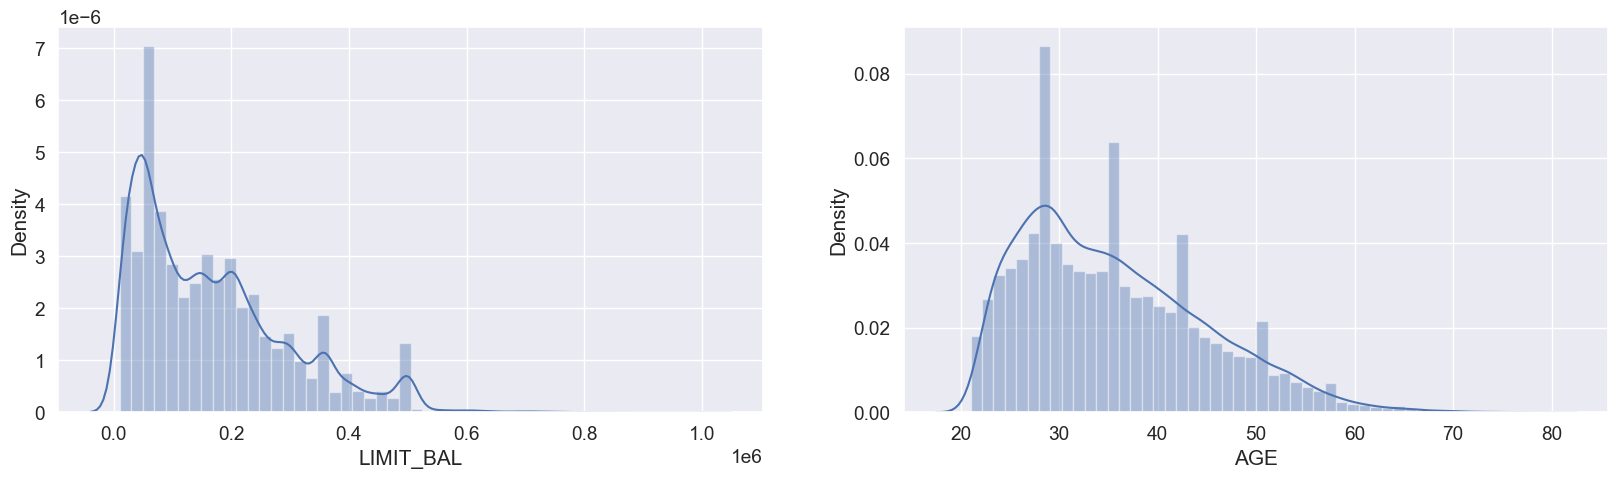

In [273]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)
plt.subplot(122)
sns.distplot(defaulters.AGE)
plt.show()

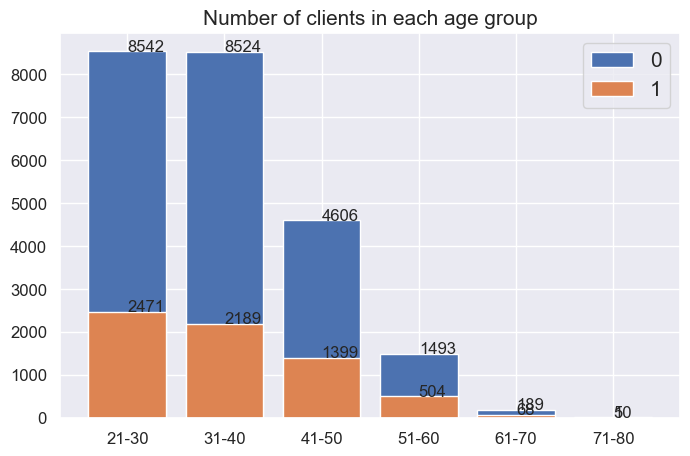

In [274]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['default payment next month'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [275]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

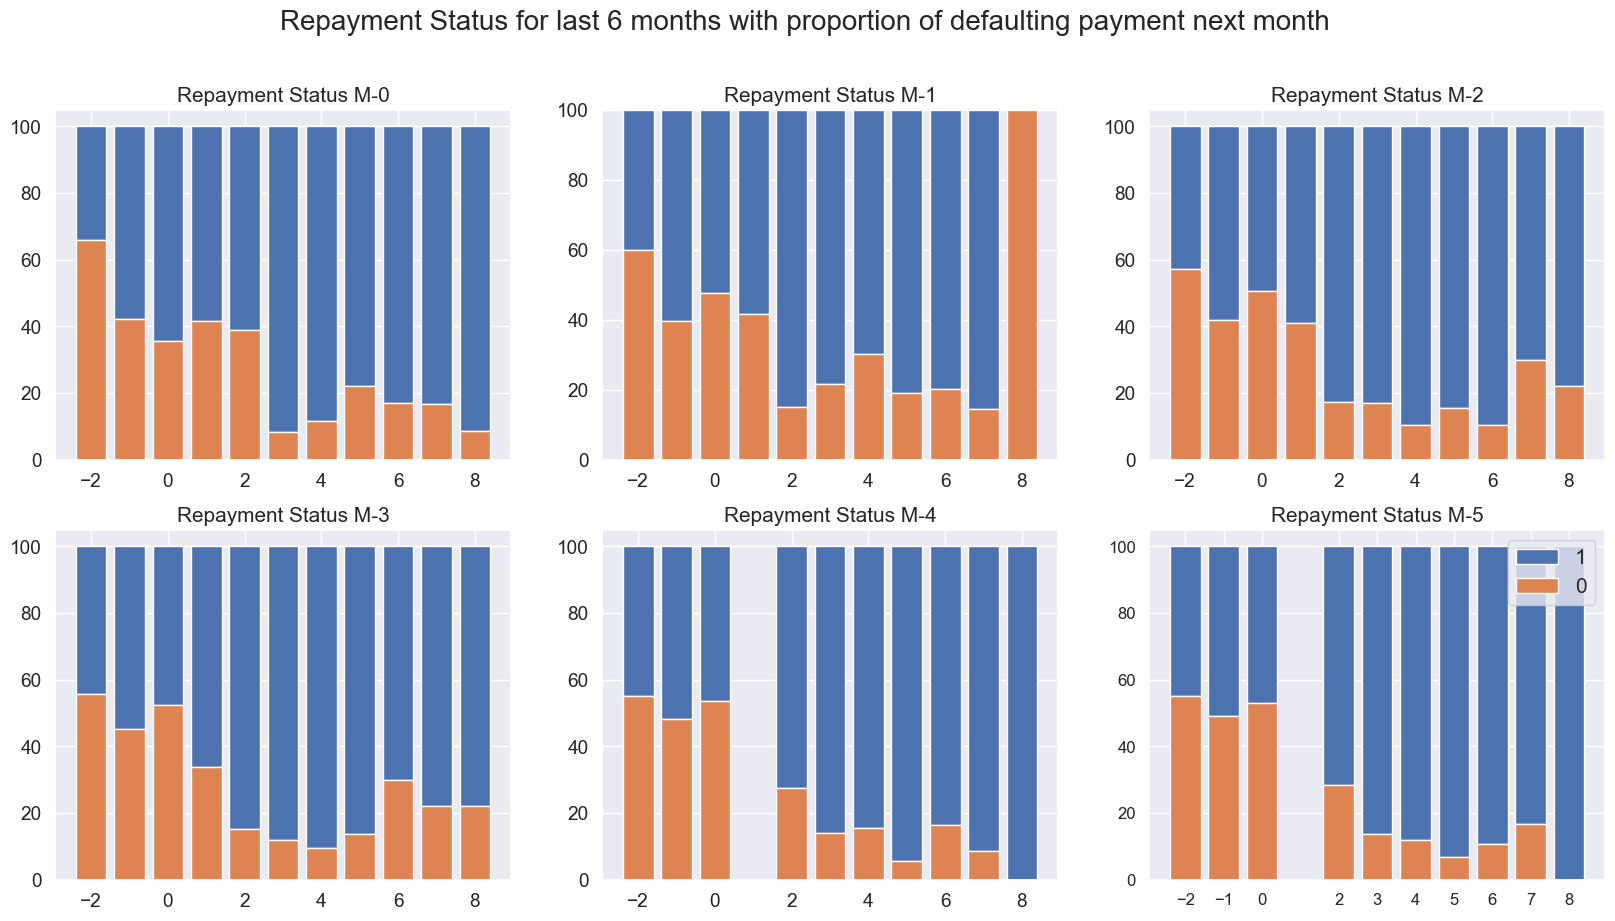

In [276]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['default payment next month'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
        if i not in pay_1.index:
            pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)
ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)
plt.show()

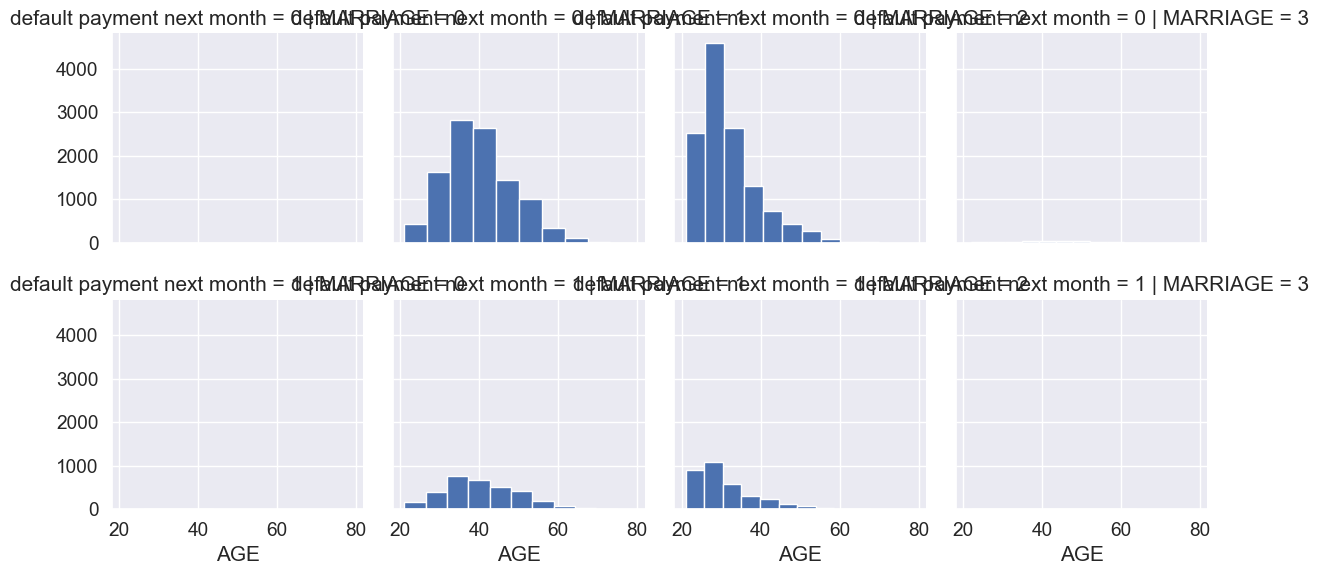

In [277]:
g = sns.FacetGrid(defaulters, row='default payment next month', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

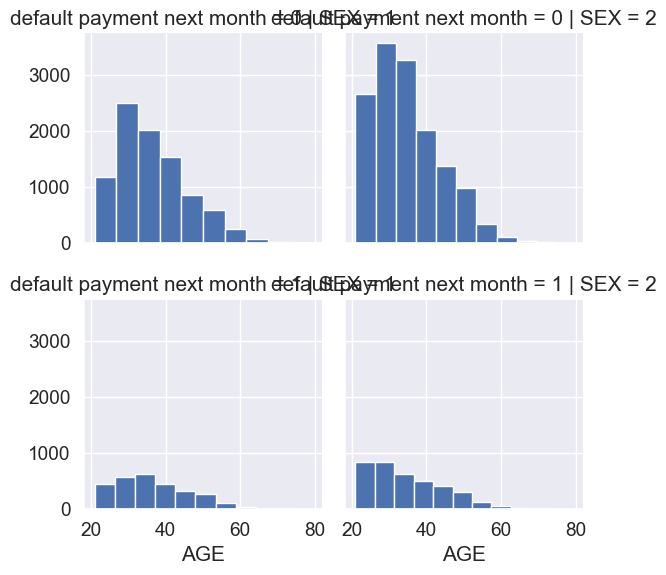

In [278]:
g = sns.FacetGrid(defaulters, row='default payment next month', col='SEX')
g = g.map(plt.hist, 'AGE')

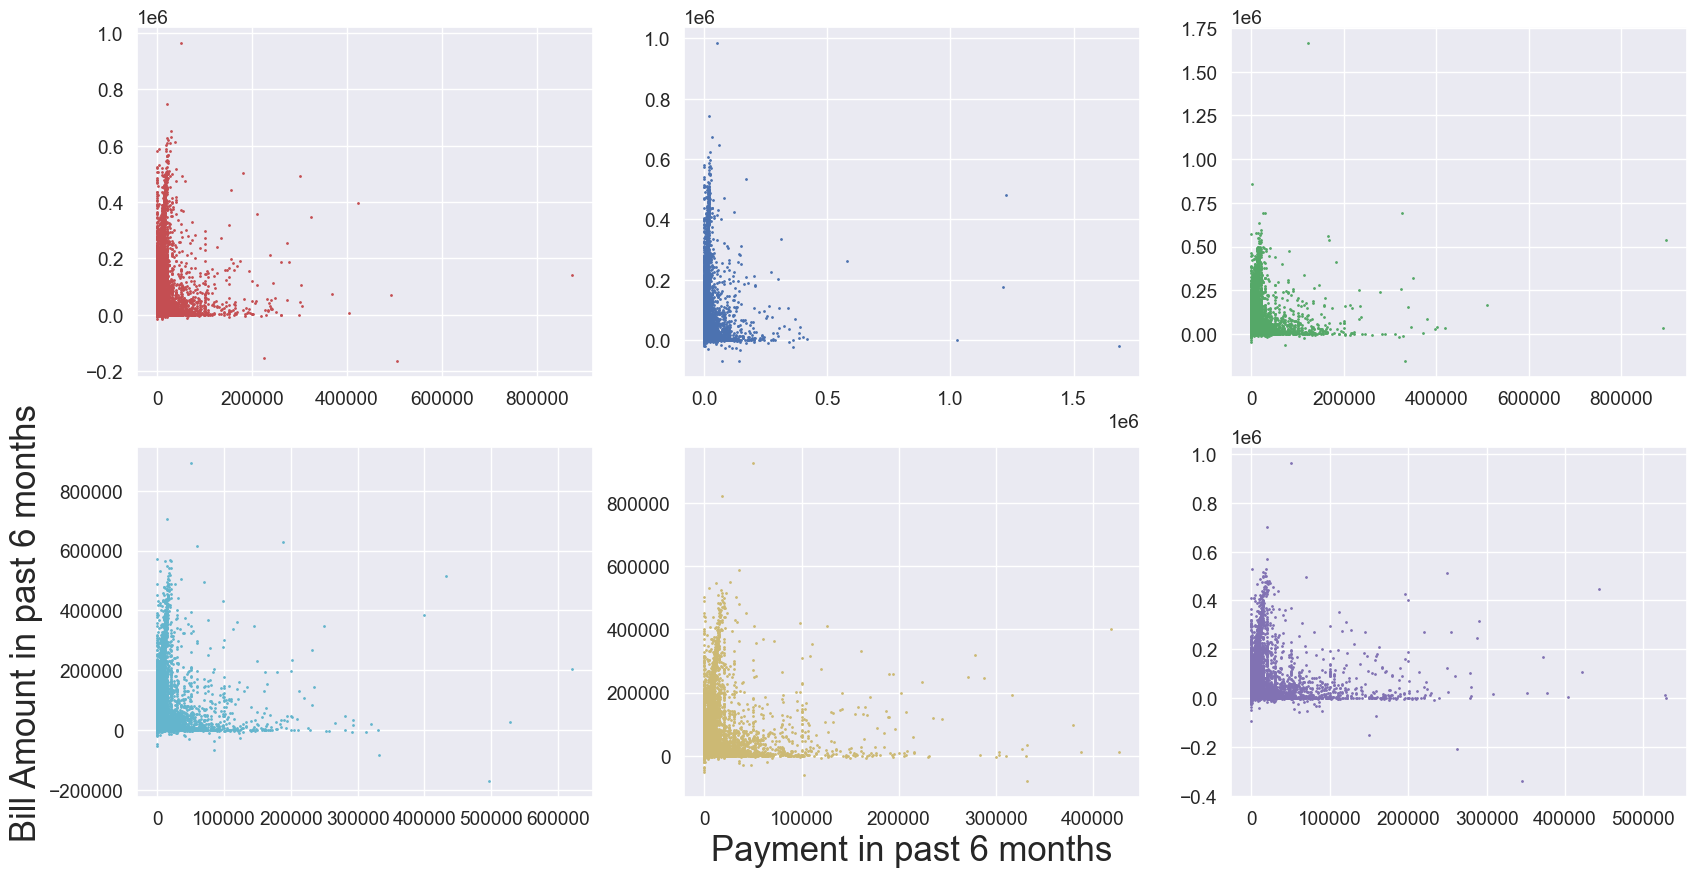

In [279]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

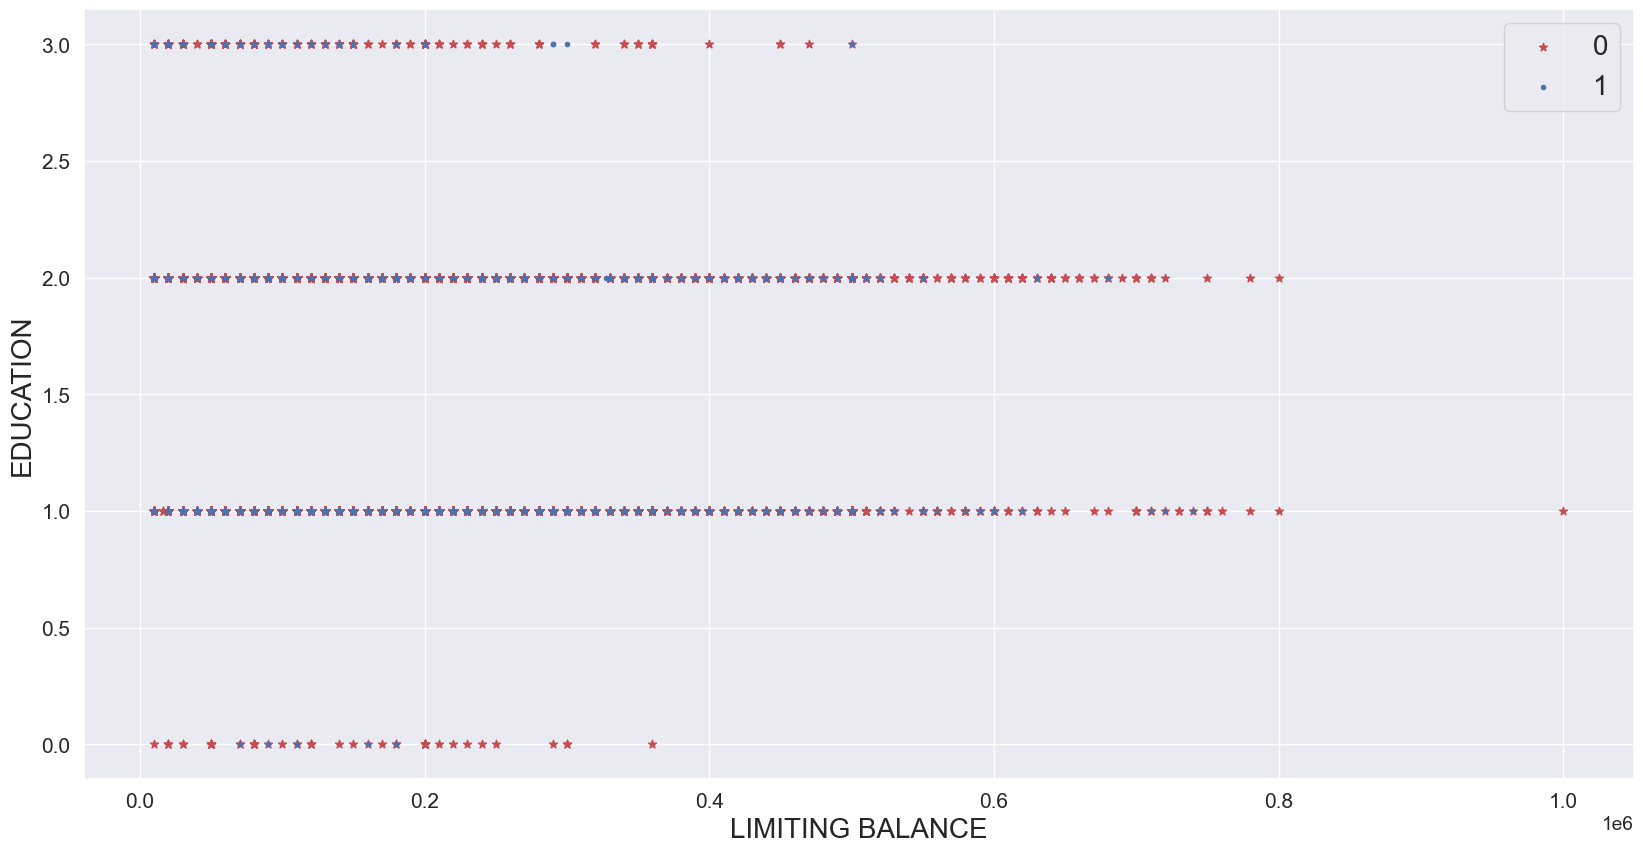

In [280]:
y1 = defaulters.MARRIAGE[defaulters["default payment next month"] == 0]
y2 = defaulters.MARRIAGE[defaulters["default payment next month"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["default payment next month"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["default payment next month"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("EDUCATION", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

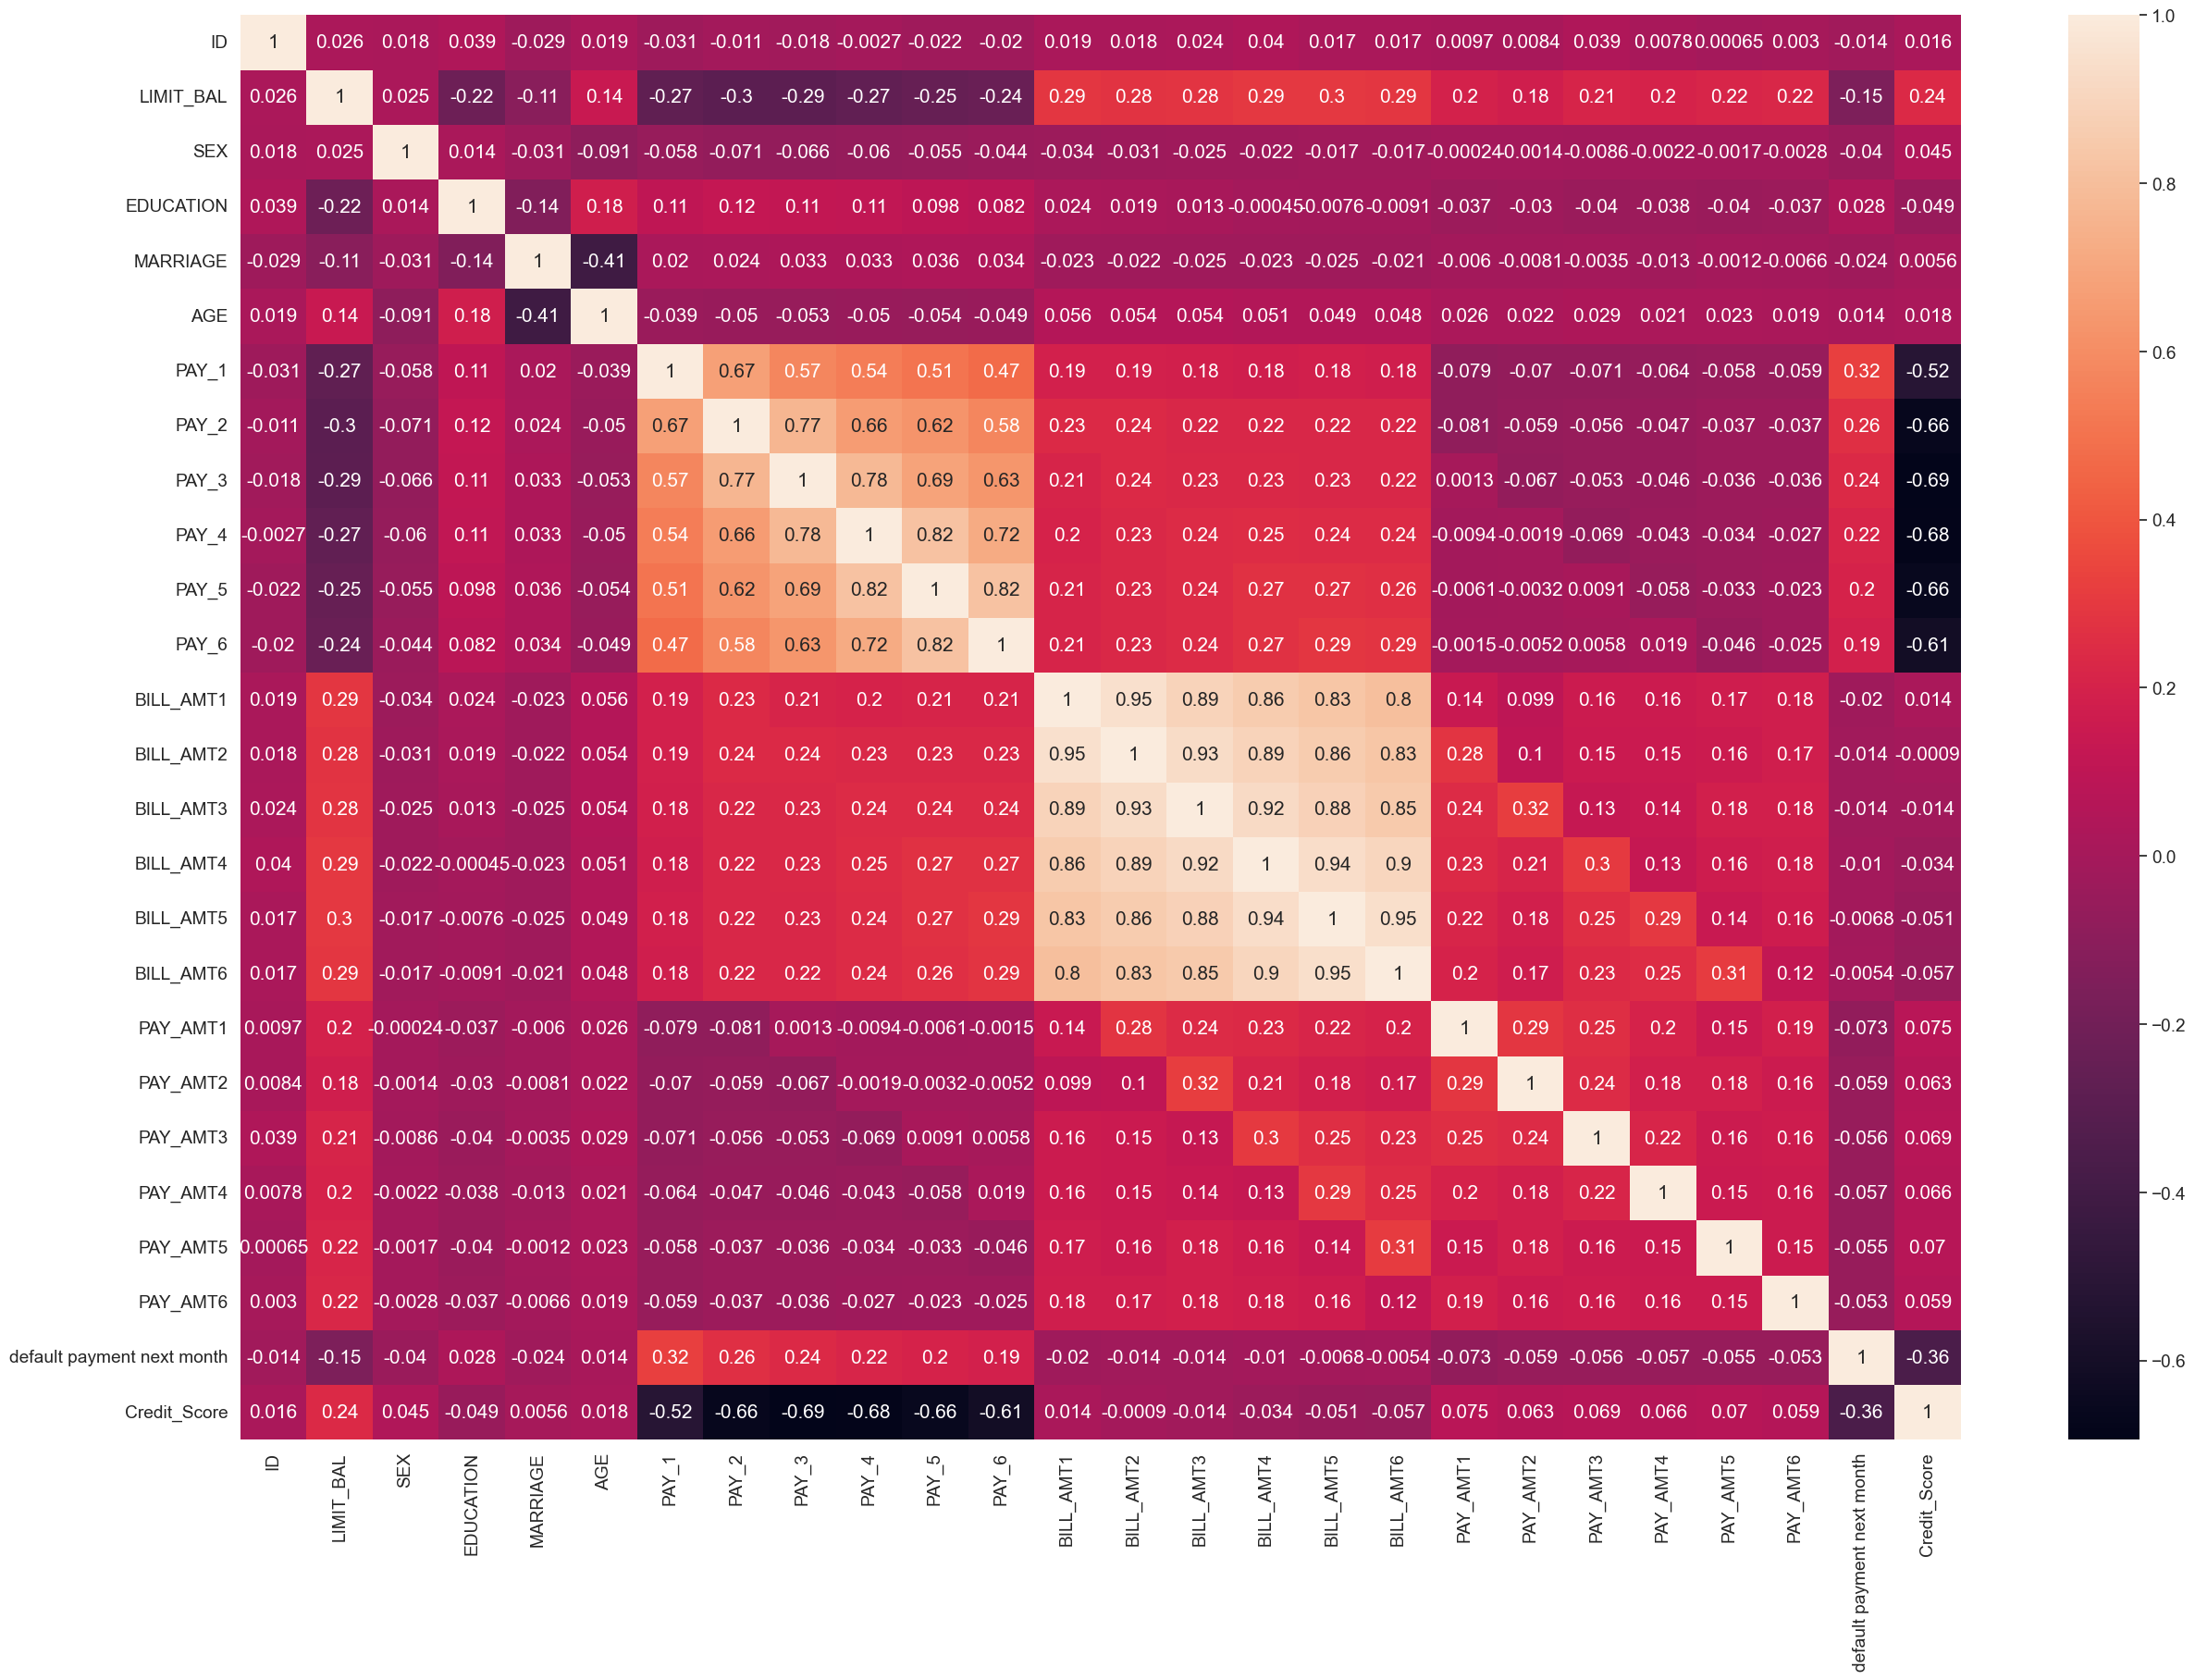

In [281]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

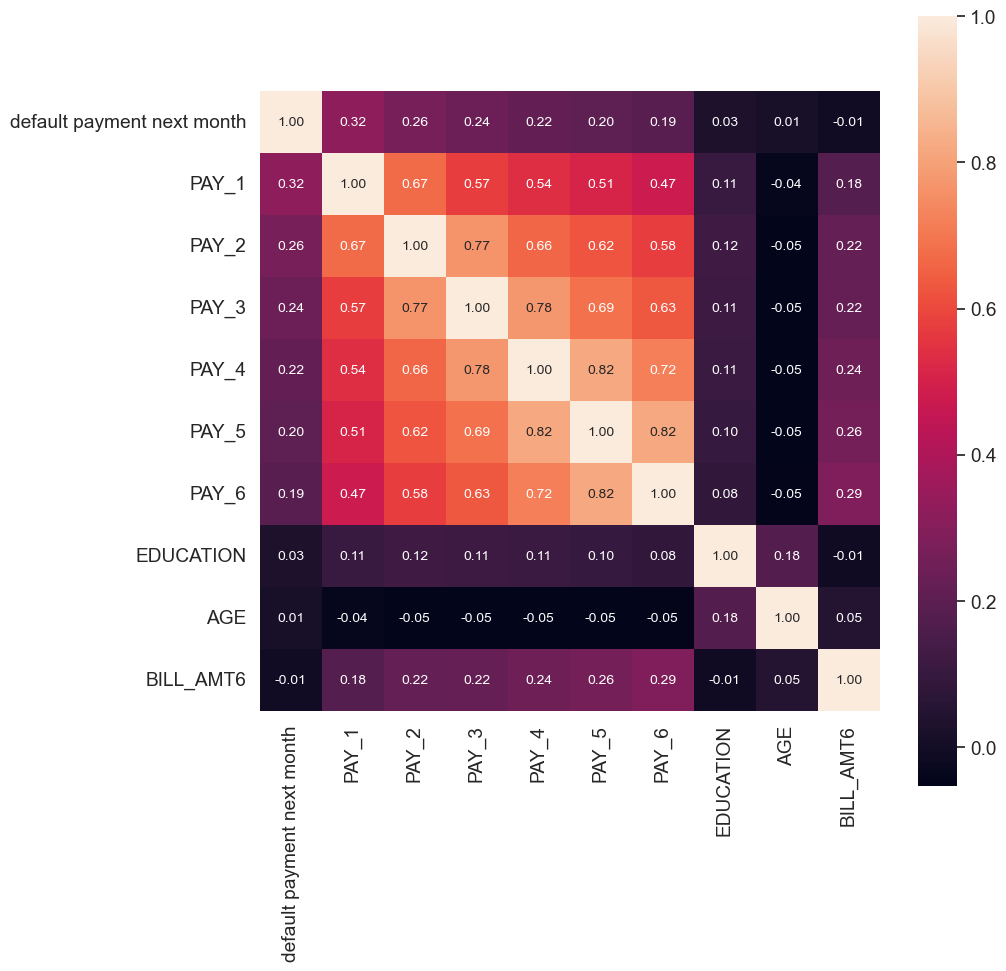

In [282]:
k = 10 
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'default payment next month')['default payment next month'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [283]:
df_X = defaulters.drop(['default payment next month','AGE_BIN'], axis=1)
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=1, random_state=10)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

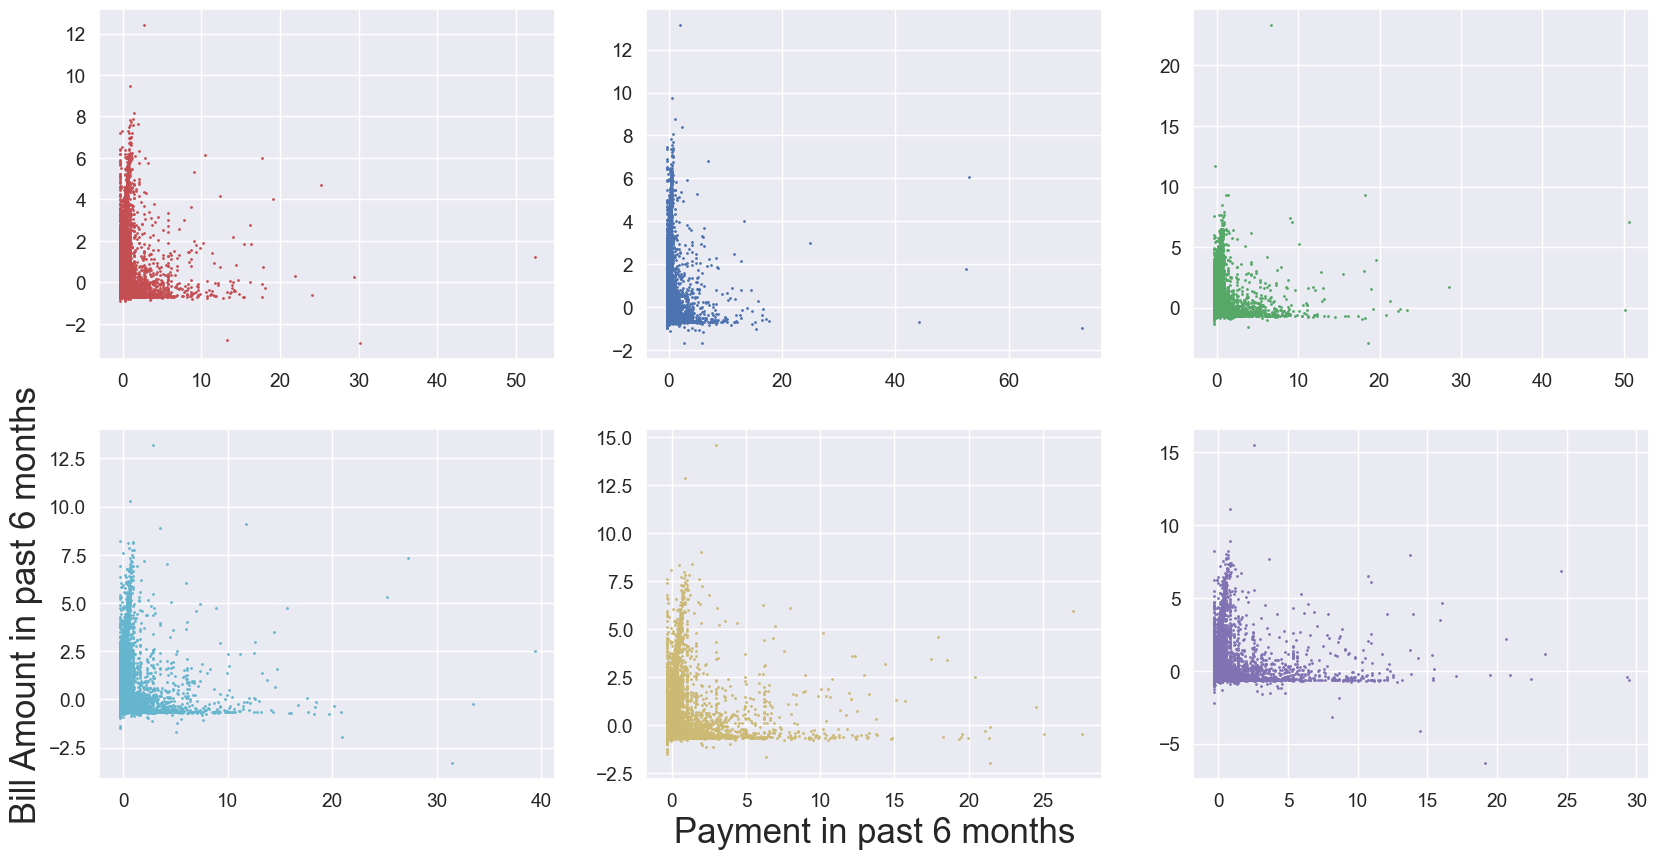

In [284]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=X_train.PAY_AMT1, y=X_train.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=X_train.PAY_AMT2, y=X_train.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=X_train.PAY_AMT3, y=X_train.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=X_train.PAY_AMT4, y=X_train.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=X_train.PAY_AMT5, y=X_train.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=X_train.PAY_AMT6, y=X_train.BILL_AMT6, c='m', s=1)

plt.show()

In [285]:
defaulters.SEX = defaulters.SEX.astype("category")
defaulters.EDUCATION = defaulters.EDUCATION.astype("category")
defaulters.MARRIAGE = defaulters.MARRIAGE.astype("category")
defaulters.PAY_1 = defaulters.PAY_1.astype("category")
defaulters.PAY_2 = defaulters.PAY_2.astype("category")
defaulters.PAY_3 = defaulters.PAY_3.astype("category")
defaulters.PAY_4 = defaulters.PAY_4.astype("category")
defaulters.PAY_5 = defaulters.PAY_5.astype("category")
defaulters.PAY_6 = defaulters.PAY_6.astype("category")
defaulters.def_type = defaulters['default payment next month'].astype("category")

In [286]:
df_X = defaulters.drop(['default payment next month','AGE_BIN'], axis=1)
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     14996
           1       0.00      0.75      0.00         4

    accuracy                           0.78     15000
   macro avg       0.50      0.76      0.44     15000
weighted avg       1.00      0.78      0.87     15000

[[11633  3363]
 [    1     3]]

Accuracy Score for model2:  0.7757333333333334


In [287]:
df_X = defaulters.drop(['default payment next month','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     14998
           1       0.00      1.00      0.00         2

    accuracy                           0.78     15000
   macro avg       0.50      0.89      0.44     15000
weighted avg       1.00      0.78      0.87     15000

[[11634  3364]
 [    0     2]]

Accuracy Score for model3:  0.7757333333333334


In [288]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     13736
           1       0.26      0.69      0.38      1264

    accuracy                           0.81     15000
   macro avg       0.61      0.76      0.63     15000
weighted avg       0.91      0.81      0.85     15000

[[11288  2448]
 [  390   874]]

Test Accuracy Score for model4:  0.8108

Train Accuracy Score for model4:  0.8104


In [289]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14556
           1       0.09      0.71      0.17       444

    accuracy                           0.79     15000
   macro avg       0.54      0.75      0.52     15000
weighted avg       0.96      0.79      0.86     15000

[[11548  3008]
 [  130   314]]

Test Accuracy Score for model5:  0.7908

Train Accuracy Score for model5:  0.7900666666666667


In [305]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred_kn=kn.predict(X_test)
print(classification_report(y_test,y_pred_kn))
print(confusion_matrix(y_test,y_pred_kn))
print('\nTest Accuracy Score for model6: ', accuracy_score(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85     11678
           1       0.26      0.10      0.14      3322

    accuracy                           0.74     15000
   macro avg       0.52      0.51      0.49     15000
weighted avg       0.67      0.74      0.69     15000

[[10769   909]
 [ 3003   319]]

Test Accuracy Score for model6:  0.7392


In [306]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print('\nTest Accuracy Score for model7: ', accuracy_score(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     11678
           1       0.51      0.37      0.42      3322

    accuracy                           0.78     15000
   macro avg       0.67      0.63      0.64     15000
weighted avg       0.76      0.78      0.77     15000

[[10493  1185]
 [ 2108  1214]]

Test Accuracy Score for model7:  0.7392


In [343]:
defaulters['Credit_Score'] = 1000
defaulters.loc[defaulters['PAY_1'] == -2, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_1'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_1'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_1'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_1'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_1'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_1'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_1'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_1'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_1'] == 9, 'Credit_Score'] -= 480
defaulters.loc[defaulters['PAY_2'] == -2, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_2'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_2'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_2'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_2'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_2'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_2'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_2'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_2'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_2'] == 9, 'Credit_Score'] -= 480
defaulters.loc[defaulters['PAY_3'] == -1, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_3'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_3'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_3'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_3'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_3'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_3'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_3'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_3'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_3'] == 9, 'Credit_Score'] -= 480
defaulters.loc[defaulters['PAY_4'] == -2, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_4'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_4'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_4'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_4'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_4'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_4'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_4'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_4'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_4'] == 9, 'Credit_Score'] -= 480
defaulters.loc[defaulters['PAY_5'] == -2, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_5'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_5'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_5'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_5'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_5'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_5'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_5'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_5'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_5'] == 9, 'Credit_Score'] -= 480
defaulters.loc[defaulters['PAY_6'] == -2, 'Credit_Score'] += 30
defaulters.loc[defaulters['PAY_6'] == -1, 'Credit_Score'] += 20
defaulters.loc[defaulters['PAY_6'] == 1, 'Credit_Score'] -= 30
defaulters.loc[defaulters['PAY_6'] == 2, 'Credit_Score'] -= 70
defaulters.loc[defaulters['PAY_6'] == 3, 'Credit_Score'] -= 120
defaulters.loc[defaulters['PAY_6'] == 4, 'Credit_Score'] -= 180
defaulters.loc[defaulters['PAY_6'] == 5, 'Credit_Score'] -= 240
defaulters.loc[defaulters['PAY_6'] == 6, 'Credit_Score'] -= 310
defaulters.loc[defaulters['PAY_6'] == 8, 'Credit_Score'] -= 390
defaulters.loc[defaulters['PAY_6'] == 9, 'Credit_Score'] -= 480




for index, row in defaulters.iterrows():
    if (row['BILL_AMT1'] > 20000) and (row['PAY_1'] <= 0):
        defaulters.at[index, 'Credit_Score'] += 10
        if (row['BILL_AMT2'] > 20000) and (row['PAY_2'] <= 0):
            defaulters.at[index, 'Credit_Score'] += 10
            if (row['BILL_AMT3'] > 20000) and (row['PAY_3'] <= 0):
                defaulters.at[index, 'Credit_Score'] += 10
                if (row['BILL_AMT4'] > 20000) and (row['PAY_4'] <= 0):
                    defaulters.at[index, 'Credit_Score'] += 10
                    if (row['BILL_AMT5'] > 20000) and (row['PAY_5'] <= 0):
                        defaulters.at[index, 'Credit_Score'] += 10
                        if (row['BILL_AMT6'] > 20000) and (row['PAY_6'] <= 0):
                            defaulters.at[index, 'Credit_Score'] += 10
                            
for index, row in defaulters.iterrows():
    if (row['BILL_AMT1'] > 20000) and (row['PAY_AMT1'] > 15000):
        defaulters.at[index, 'Credit_Score'] += 5
        if (row['BILL_AMT2'] > 20000) and (row['PAY_AMT2'] > 15000):
            defaulters.at[index, 'Credit_Score'] += 5
            if (row['BILL_AMT3'] > 20000) and (row['PAY_AMT3'] > 15000):
                defaulters.at[index, 'Credit_Score'] += 5
                if (row['BILL_AMT4'] > 20000) and (row['PAY_AMT4'] > 15000):
                    defaulters.at[index, 'Credit_Score'] += 5
                    if (row['BILL_AMT5'] > 20000) and (row['PAY_AMT5'] > 15000):
                        defaulters.at[index, 'Credit_Score'] += 5
                        if (row['BILL_AMT6'] > 20000) and (row['PAY_AMT6'] > 15000):
                            defaulters.at[index, 'Credit_Score'] += 5

    
    

for index, row in defaulters.iterrows():
    if row['BILL_AMT1'] or row['BILL_AMT2'] or row['BILL_AMT3'] or row['BILL_AMT4'] or row['BILL_AMT5'] or row['BILL_AMT6']> row['LIMIT_BAL'] * 0.8:
        defaulters.at[index, 'Credit_Score'] -= 10

for index, row in defaulters.iterrows():
    if (row['LIMIT_BAL'] < 55000) and (row['AGE'] < 26):
        defaulters.at[index, 'Credit_Score'] -=20

for index, row in defaulters.iterrows():
    if (row['LIMIT_BAL'] < 55000) and (row['EDUCATION'] == 1 or 2 or 3):
        defaulters.at[index, 'Credit_Score'] -=20
        
        
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Credit_Score,AGE_BIN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,940,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,870,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1000,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1030,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,1040,51-60


In [344]:
df_X = defaulters[['SEX','MARRIAGE','AGE','EDUCATION','Credit_Score','BILL_AMT1','PAY_1']]
df_y = defaulters['default payment next month']


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=20)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print('\nTest Accuracy Score for model7: ', accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11678
           1       0.57      0.39      0.46      3322

    accuracy                           0.80     15000
   macro avg       0.71      0.65      0.67     15000
weighted avg       0.78      0.80      0.79     15000

[[10716   962]
 [ 2029  1293]]

Test Accuracy Score for model7:  0.8006


In [311]:
df_X = defaulters[['SEX','MARRIAGE','AGE','EDUCATION','BILL_AMT1','PAY_1']]
df_y = defaulters['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.5, random_state=20)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print('\nTest Accuracy Score for model7: ', accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     11678
           1       0.50      0.36      0.42      3322

    accuracy                           0.78     15000
   macro avg       0.67      0.63      0.64     15000
weighted avg       0.76      0.78      0.76     15000

[[10475  1203]
 [ 2125  1197]]

Test Accuracy Score for model7:  0.7781333333333333
